In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
labeled_images = pd.read_csv('train.csv')

print(labeled_images.shape)


(42000, 785)


In [8]:
labels = labeled_images.iloc[:, 0]
images = labeled_images.iloc[:, 1:]

In [9]:
print(labels.shape)
print(images.shape)

(42000,)
(42000, 784)


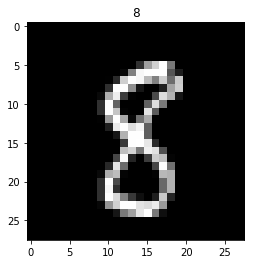

In [30]:
i = 618
img = images.iloc[i].as_matrix().reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.title(labels[i])